In [1]:
import os, sys
s3_home =  os.getcwd()
try: sys.path.remove(s3_home) 
except Exception: pass
current_dir = os.getcwd()
os.chdir('DATA_PATH/ozone') 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np

os.chdir(current_dir) 
sys.path.append(s3_home) 


2022-09-03 11:52:58.194987: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-03 11:52:58.195043: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<hr>

In [2]:
dataset = pd.read_csv("DATA_PATH/INPUT_Sentinel-5p.csv") 
dataset

,rad_325.0_nm,rad_325.5_nm,rad_326.0_nm,rad_326.5_nm,rad_327.0_nm,rad_327.5_nm,rad_328.0_nm,rad_328.5_nm,rad_329.0_nm,rad_329.5_nm,...,rad_333.0_nm,rad_333.5_nm,rad_334.0_nm,rad_334.5_nm,rad_335.0_nm,sza,vza,lat,lon,ozone_total_column_[DU]
0,0.042720,0.052927,0.064092,0.066062,0.062508,0.059063,0.054011,0.055656,0.072492,0.076385,...,0.066981,0.058454,0.064113,0.068836,0.067544,59.516346,7.200823,34.040398,15.452230,312.801062
1,0.035083,0.043096,0.052921,0.054148,0.052210,0.049266,0.044553,0.045935,0.058220,0.062203,...,0.053694,0.047931,0.050669,0.055808,0.052929,58.856736,10.524595,33.157636,16.177355,311.510057
2,0.032866,0.039644,0.050325,0.050918,0.050511,0.047489,0.042784,0.044021,0.054030,0.059267,...,0.050887,0.047117,0.047478,0.054090,0.049683,60.072235,14.218850,34.355670,16.398046,310.450920
3,0.034466,0.042574,0.051158,0.052547,0.049777,0.046973,0.042978,0.044233,0.057255,0.060181,...,0.052075,0.045585,0.049813,0.053308,0.052190,60.109164,6.403538,34.733997,15.136957,307.712248
4,0.031162,0.038639,0.046340,0.047647,0.045056,0.042522,0.038951,0.040127,0.052197,0.054791,...,0.047542,0.041568,0.045608,0.048783,0.047797,62.851804,5.198928,37.823663,14.033505,296.586119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.035029,0.034219,0.046429,0.051954,0.053398,0.049628,0.048426,0.044431,0.047056,0.057794,...,0.054243,0.053478,0.045803,0.053406,0.055708,62.746115,26.651324,36.751738,17.785243,300.032216
2496,0.028071,0.034575,0.041262,0.042478,0.039951,0.037723,0.034540,0.035691,0.046237,0.048472,...,0.041648,0.036282,0.040008,0.042476,0.041984,62.784141,4.876854,37.760609,14.001978,296.118841
2497,0.033929,0.041685,0.052090,0.053287,0.051815,0.048783,0.043879,0.045482,0.057710,0.062159,...,0.054260,0.048758,0.050999,0.056917,0.053629,63.468435,11.365543,38.265044,14.853213,302.393093
2498,0.031069,0.038370,0.045653,0.047141,0.044044,0.041472,0.038281,0.039707,0.051756,0.054031,...,0.046890,0.040487,0.045092,0.047425,0.047548,63.734396,2.560235,38.895588,13.276852,304.393545


In [3]:
X = dataset.values[:, 0:23]
y = dataset.values[:, 25:26]

X.shape, y.shape

((2500, 23), (2500, 1))

<br>

In [4]:
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X, 
                                                                    y, 
                                                                    test_size=0.4, 
                                                                    random_state=32)

X_train.shape, X_val_and_test.shape, y_train.shape, y_val_and_test.shape

((1500, 23), (1000, 23), (1500, 1), (1000, 1))

<br>

In [5]:
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, 
                                                y_val_and_test, 
                                                test_size=0.45, 
                                                random_state=32)

X_val.shape, X_test.shape, y_val.shape, y_test.shape

((550, 23), (450, 23), (550, 1), (450, 1))

<br>

In [6]:
input_scaler = MinMaxScaler(feature_range=(-5, 5))
output_scaler = MinMaxScaler(feature_range=(0, 1))

<br>

In [7]:
input_scaler.fit(X)
X_train_scaled = input_scaler.transform(X_train)
X_val_scaled = input_scaler.transform(X_val)
X_test_scaled = input_scaler.transform(X_test)

output_scaler.fit(y)
y_train_scaled = output_scaler.transform(y_train)
y_val_scaled = output_scaler.transform(y_val)

<br>

In [8]:
model_nn_for_o3 = Sequential([Dense(units=20, 
                                    activation='sigmoid', 
                                    input_shape=(23,)),
                              Dense(units=1, 
                                    activation='sigmoid')])

2022-09-03 11:53:04.547177: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-09-03 11:53:04.547426: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-03 11:53:04.547488: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-09-03 11:53:04.547538: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-09-03 11:53:04.547588: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

<br>

In [9]:
model_nn_for_o3.compile(optimizer='sgd',  
                        loss='mean_squared_error',  
                        metrics=['mae'])

<br>

In [10]:
start_training = time.time()

hist = model_nn_for_o3.fit(X_train_scaled, 
                           y_train_scaled, 
                           batch_size=10, 
                           epochs=300, 
                           validation_data=(X_val_scaled, y_val_scaled), 
                           verbose=1)

end_training = time.time()
print("Training time ", round((end_training - start_training), 3), "s" )

Epoch 1/300
150/150 [==============================] - 1s 3ms/step - loss: 0.0625 - mae: 0.2042 - val_loss: 0.0422 - val_mae: 0.1690
Epoch 2/300
150/150 [==============================] - 0s 2ms/step - loss: 0.0428 - mae: 0.1702 - val_loss: 0.0375 - val_mae: 0.1579
Epoch 3/300
150/150 [==============================] - 0s 2ms/step - loss: 0.0385 - mae: 0.1610 - val_loss: 0.0340 - val_mae: 0.1504
Epoch 4/300
150/150 [==============================] - 0s 2ms/step - loss: 0.0351 - mae: 0.1536 - val_loss: 0.0315 - val_mae: 0.1446
Epoch 5/300
150/150 [==============================] - 0s 2ms/step - loss: 0.0326 - mae: 0.1476 - val_loss: 0.0294 - val_mae: 0.1401
Epoch 6/300
150/150 [==============================] - 0s 2ms/step - loss: 0.0306 - mae: 0.1430 - val_loss: 0.0278 - val_mae: 0.1364
Epoch 7/300
150/150 [==============================] - 0s 2ms/step - loss: 0.0290 - mae: 0.1390 - val_loss: 0.0265 - val_mae: 0.1332
Epoch 8/300
150/150 [==============================] - 0s 2ms/step - 

<br>

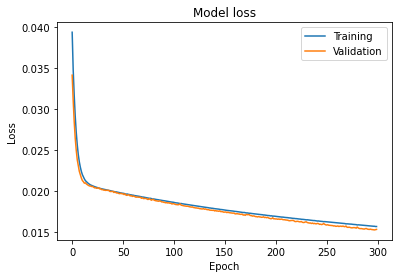

In [13]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

Plot the `mean absolute error` during the training epochs by plotting `mae` and `val_mae` metrics.

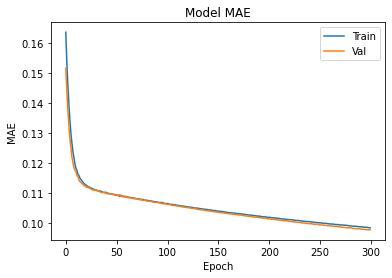

In [14]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

<br>

In [15]:
predict_train = model_nn_for_o3.predict(X_train_scaled)
predict_val = model_nn_for_o3.predict(X_val_scaled)
predict_test = model_nn_for_o3.predict(X_test_scaled)
predict_train

15/15 [==============================] - 0s 1ms/step


array([[0.6831615 ],
       [0.36344427],
       [0.6574628 ],
       ...,
       [0.3362277 ],
       [0.3153641 ],
       [0.4019596 ]], dtype=float32)

<br>

In [16]:
predict_train_inverse = output_scaler.inverse_transform(predict_train)
predict_val_inverse = output_scaler.inverse_transform(predict_val)
predict_test_inverse = output_scaler.inverse_transform(predict_test)
predict_train_inverse

array([[309.8474 ],
       [302.0669 ],
       [309.22202],
       ...,
       [301.40454],
       [300.89682],
       [303.00418]], dtype=float32)

<br>

In [17]:
model_nn_for_o3.save("DATA_PATH/model_ozone.h5")

<br>

In [18]:
mae_train = mean_absolute_error(y_train, predict_train_inverse)
mae_val = mean_absolute_error(y_val, predict_val_inverse)
mae_test = mean_absolute_error(y_test, predict_test_inverse)

print(f'Train MAE: {round(mae_train, 3)} DU, Val MAE: {round(mae_val, 3)} DU, Test MAE: {round(mae_test, 3)} DU')

Train MAE: 2.397 DU, Val MAE: 2.383 DU, Test MAE: 2.471 DU


<br>

In [19]:
rmse_train = mean_squared_error(y_train, predict_train_inverse, squared=False)
rmse_val = mean_squared_error(y_val, predict_val_inverse, squared=False)
rmse_test = mean_squared_error(y_test, predict_test_inverse, squared=False)

print(f'Train RMSE: {round(rmse_train, 3)} DU, Val RMSE: {round(rmse_val, 3)} DU, Test RMSE: {round(rmse_test, 3)} DU')

Train RMSE: 3.043 DU, Val RMSE: 3.009 DU, Test RMSE: 3.117 DU


<br>

In [20]:
pearson_train = np.sqrt(r2_score(y_train, predict_train_inverse))
pearson_val = np.sqrt(r2_score(y_val, predict_val_inverse))
pearson_test = np.sqrt(r2_score(y_test, predict_test_inverse))

print(f'Train Pearson: {round(pearson_train, 3)}, Val Pearson: {round(pearson_val, 3)}, Test Pearson: {round(pearson_test, 3)}')

Train Pearson: 0.797, Val Pearson: 0.786, Test Pearson: 0.808


<br>

<br>

<br>